<a href="https://colab.research.google.com/github/LCaravaggio/Cosas_Sueltas/blob/main/DF_de_Eze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
datasets=pd.read_pickle('/df_num.pkl')

In [4]:
datasets=datasets.dropna()

In [5]:
df_train, df_test=train_test_split(datasets, test_size=0.2, random_state=0)

In [6]:
X_train=df_train.drop(columns=['Clase'])
X_test=df_test.drop(columns=['Clase'])
Y_train=df_train['Clase'].values
Y_test=df_test['Clase'].values

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

In [8]:
et = ExtraTreesClassifier()

In [9]:
X_train.shape

(18633, 135)

In [10]:
def plotBoundaryDT(data, labels, X_test,y_test, clf_1=None, N=20):
    class_1 = data[labels == 1]
    class_0 = data[labels == 0]
    mins = data[:,:2].min(axis=0)
    maxs = data[:,:2].max(axis=0)
    x1 = np.linspace(mins[0], maxs[0], N)
    x2 = np.linspace(mins[1], maxs[1], N)
    x1, x2 = np.meshgrid(x1, x2)
    X=np.c_[x1.flatten(), x2.flatten()]
    fig = plt.figure(figsize=(18,6))
    plt.subplot(121)
    ax = fig.gca()
    cm = plt.cm.RdBu
    if(clf_1):
        Z_nn = clf_1.predict_proba(X)[:, 0]
        # Put the result into a color plot
        Z_nn = Z_nn.reshape(x1.shape)
        ax.contourf(x1, x2, Z_nn,cmap=plt.cm.RdYlBu)
    #ax.scatter(class_1[:,0], class_1[:,1], color='r', s=20, alpha=0.5)
    #ax.scatter(class_0[:,0], class_0[:,1], color='b', s=20, alpha=0.5)
    class_1 = X_test[y_test == 1]
    class_0 = X_test[y_test == 0]
    plt.subplot(122)
    ax = fig.gca()
    cm = plt.cm.RdBu
    if(clf_1):
        Z_nn = clf_1.predict_proba(X)[:, 0]
        # Put the result into a color plot
        Z_nn = Z_nn.reshape(x1.shape)
        ax.contourf(x1, x2, Z_nn,cmap=plt.cm.RdYlBu)
    ax.scatter(class_1[:,0], class_1[:,1], color='r', s=20, alpha=0.5)
    ax.scatter(class_0[:,0], class_0[:,1], color='b', s=20, alpha=0.5)

In [12]:
vars=['desc_agrupacion_rubro_bain_ordinal','ds_estado_establecimiento_ordinal']

In [13]:
train=X_train[vars].to_numpy()
test=X_test[vars].to_numpy()

In [14]:
et.fit(train,Y_train)

ExtraTreesClassifier()

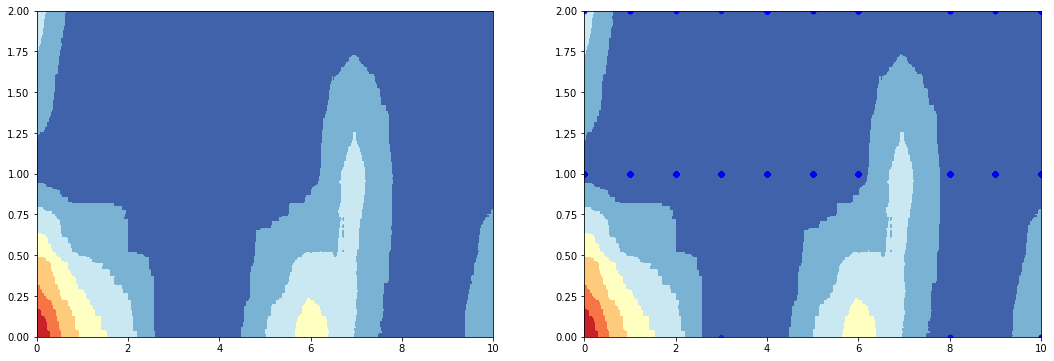

In [15]:
plotBoundaryDT(train,Y_train,test,Y_test,et,N=500)